### SESSION 29 - EXPLORATORY DATA  ANALYSIS

#### EDA ON TITANIC DATASET

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATASETS/S29/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




analysis.aluesabin
utliers

#### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

**Note:** Remember it is an iterative process

### STEPS FOR EDA :
#### 1.Label the column types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin


#### 2.Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

##### **Identify Shape:**
The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.


##### **Dispersion:**
Dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### Age:
conclusions:
- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

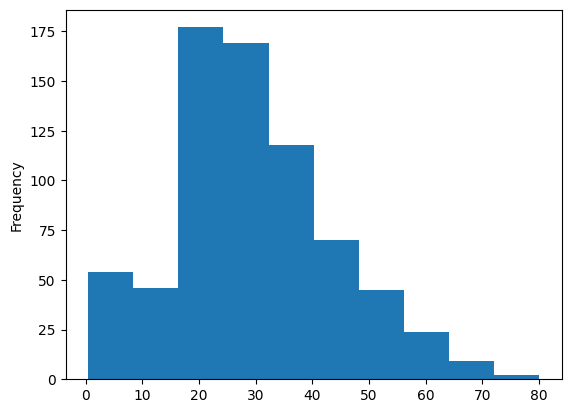

In [5]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

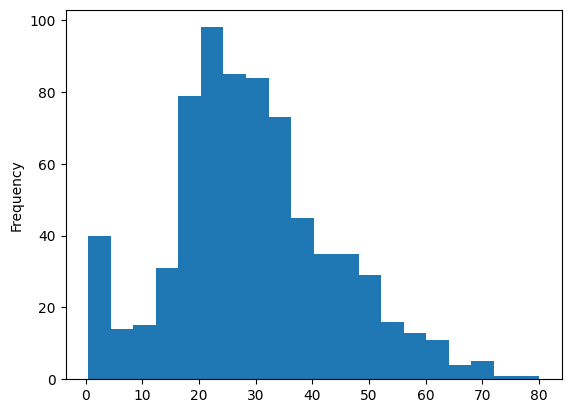

In [6]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

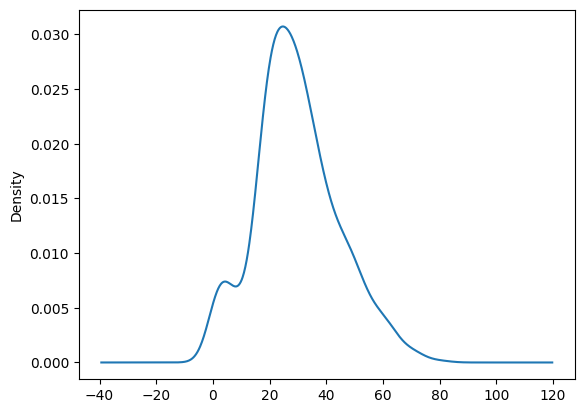

In [7]:
df['Age'].plot(kind='kde')

In [8]:
# used in statistic
df['Age'].skew()

0.38910778230082704

<Axes: >

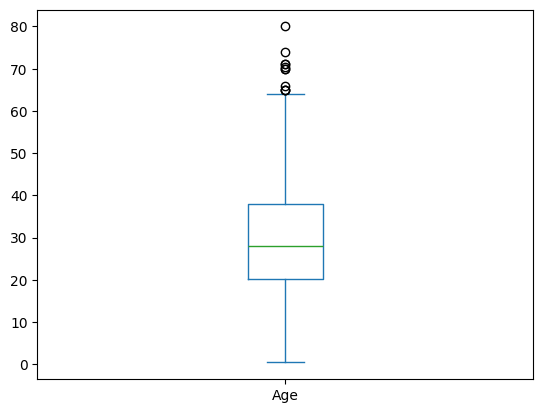

In [9]:
# visualiztion of outliers
df['Age'].plot(kind='box')

In [10]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [11]:
# missing values in percetages
length = len(df['Age'])
missing_values = df['Age'].isnull().sum()
print(missing_values/length)

0.19865319865319866


#### Fare:
conclusions:
- The data is highly skewed (positively)
- Fare col actually contains the group fre and not the indivutual fare (This might be and issue)
- We need to create a new indivual fare col

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

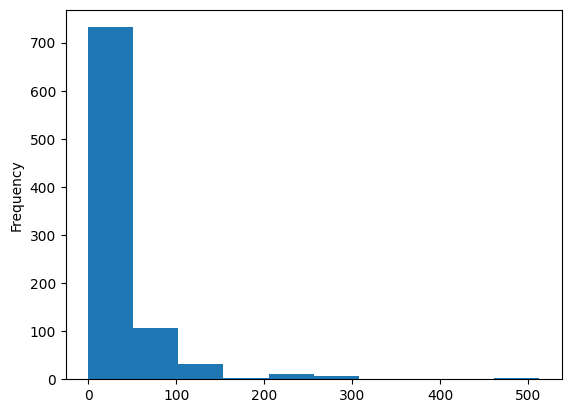

In [13]:
df['Fare'].plot(kind='hist',)

<Axes: ylabel='Density'>

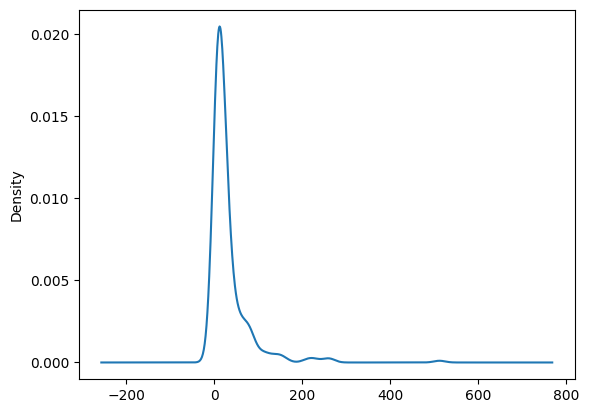

In [14]:
# Check the distribution
df['Fare'].plot(kind='kde')

In [15]:
# check skewed or not ?
df['Fare'].skew()

4.787316519674893

<Axes: >

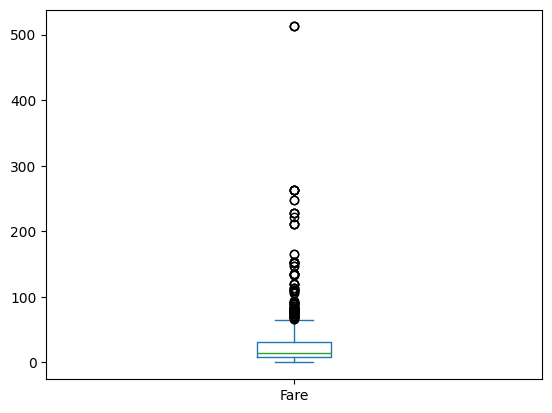

In [16]:
# Outliers
df['Fare'].plot(kind='box')

In [17]:
# Check the distribution
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [18]:
# missing values 
df['Fare'].isnull().sum()

0

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### Survived
**conclusion:**

In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

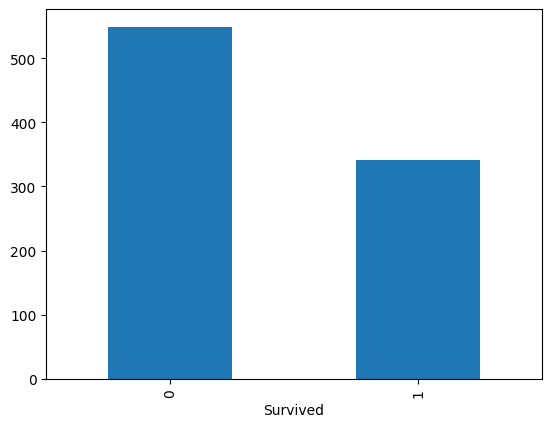

In [20]:
# plot bar chart
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

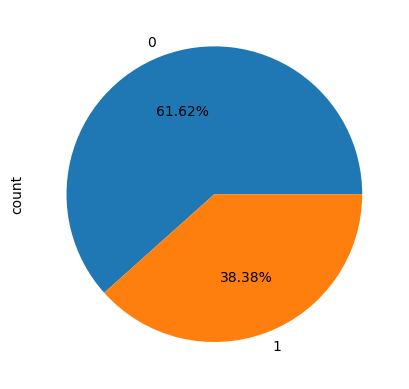

In [21]:
# plot pie chart with percentage
df['Survived'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [22]:
# Missing values
df['Survived'].isnull().sum()

0

#### Pclass
**conclusion:**

In [23]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

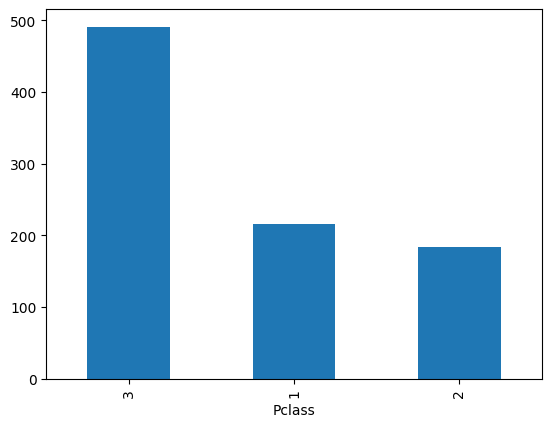

In [24]:
# plot bar chart
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

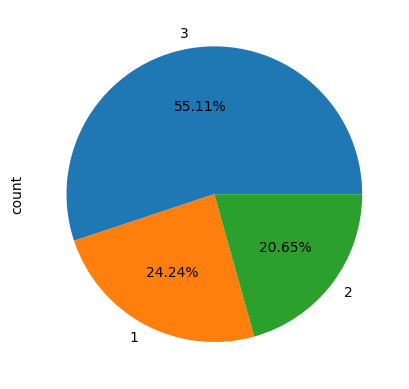

In [25]:
# plot pie chart with percentage
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [26]:
# Missing values
df['Pclass'].isnull().sum()

0

#### Sex 
**conclusion:**

In [27]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

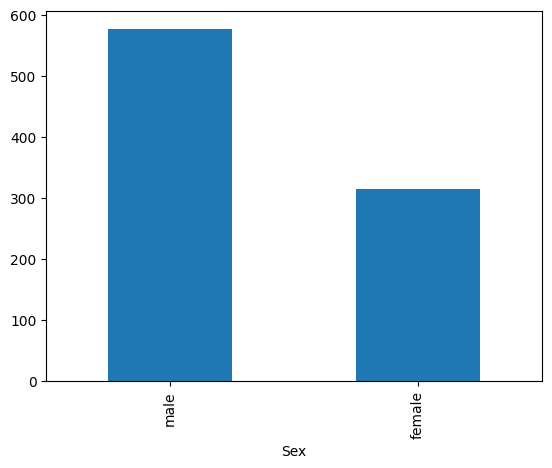

In [28]:
# plot bar chart
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

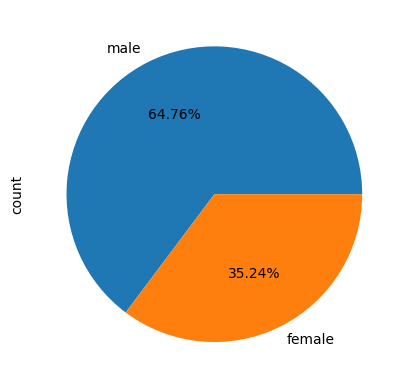

In [29]:
# plot pie chart with percentage
df['Sex'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [30]:
# Missing values
df['Sex'].isnull().sum()

0

#### SibSp 
**conclusion:**

In [31]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

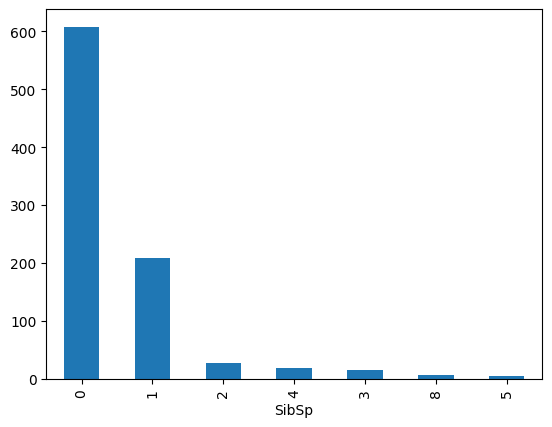

In [32]:
# plot bar chart
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

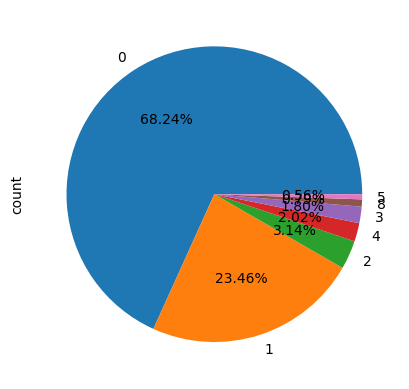

In [33]:
# plot pie chart with percentage
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [34]:
# Missing values
df['SibSp'].isnull().sum()

0

#### Parch (Parent Child)
**conclusion:**
- Parch and SibSp cols can be merged to form a new clone call family_size
- Creating a new col called is_alone

In [35]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

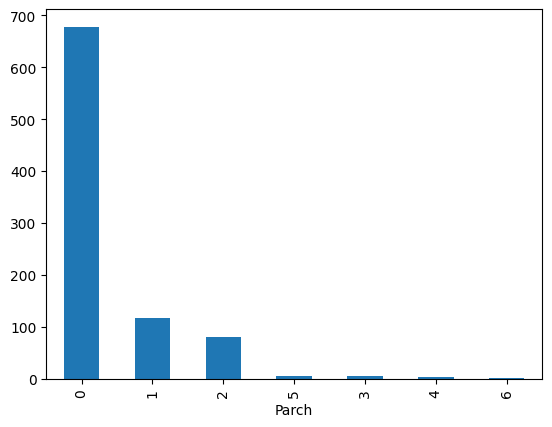

In [36]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

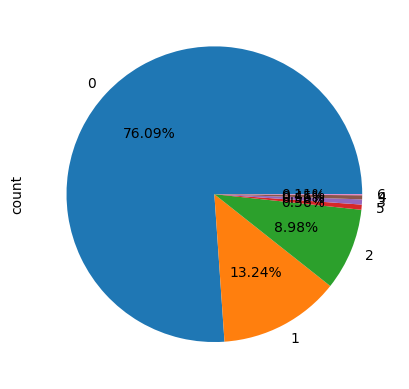

In [37]:
df['Parch'].value_counts().plot(kind='pie', autopct="%0.2f%%")

#### Embarked
**conclusion:**


In [38]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

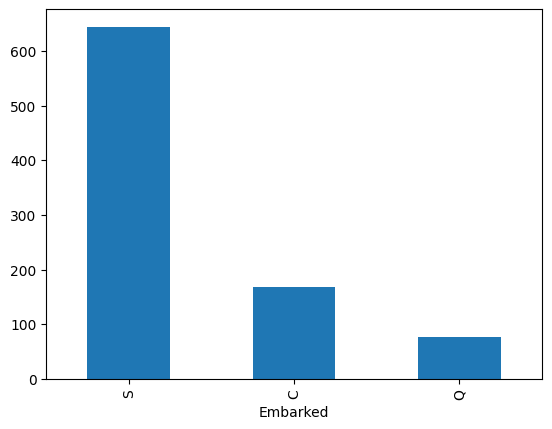

In [39]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

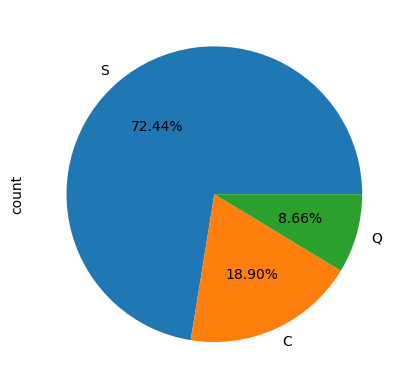

In [40]:
df['Embarked'].value_counts().plot(kind='pie', autopct="%0.2f%%")

##### Mixed - Name, Ticket, Cabin
**conclusion:**
- Need to feature engineering on mixd column to get insights

### Bivariate Analysis:
#### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

<Axes: xlabel='Pclass', ylabel='Survived'>

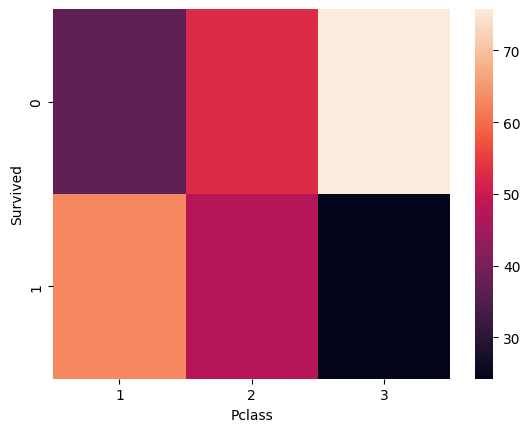

In [41]:
# categorical- categoriacal
# apply crosstab on two categorical columns
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100)

# conclusion:
# Travel in Pclass 3 is very risky and In Pclass 1 is muxh better

In [42]:
# categorical- categoriacal
# apply crosstab on two categorical columns
pd.crosstab(df['Survived'], df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [43]:
# categorical- categoriacal
# compairing
pd.crosstab(df['Survived'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [44]:
# compairing
pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [45]:
# compairing
pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100
# Here C have safest people

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


**Bivariate Analysis on Survived and Age to find relation on columns:**

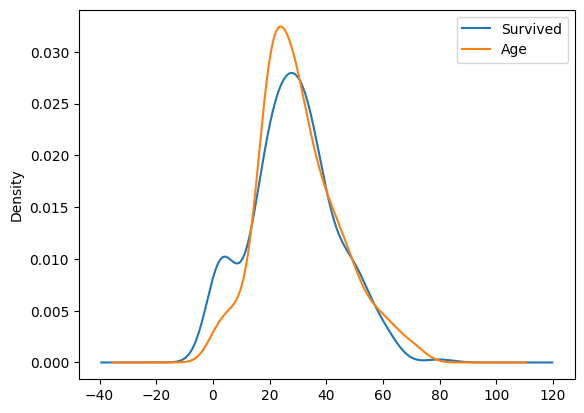

In [46]:
# According to aged we calculate survivel chances increase or decrease
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Age')
plt.legend()
plt.show()
# in plot 
# between age 0 to 10 is survived chances increase
# between age 20 to 35 is survived chances less
# betwenn age above 40 is survived chances less

**Feature Engineering on Fare col:**

In [47]:
#Try to do feature engineering to calculate each person Fare:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [48]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [54]:
df1 = pd.read_csv('DATASETS/S29/test.csv')

In [55]:
df = pd.concat([df, df1])

In [56]:
df['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1727, dtype: object

In [59]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [60]:
df['Ticket'].value_counts()

Ticket
CA. 2343        15
PC 17608        12
347077          10
CA 2144         10
S.O.C. 14879     9
                ..
113792           1
36209            1
323592           1
315089           1
218629           1
Name: count, Length: 929, dtype: int64

In [61]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

<Axes: >

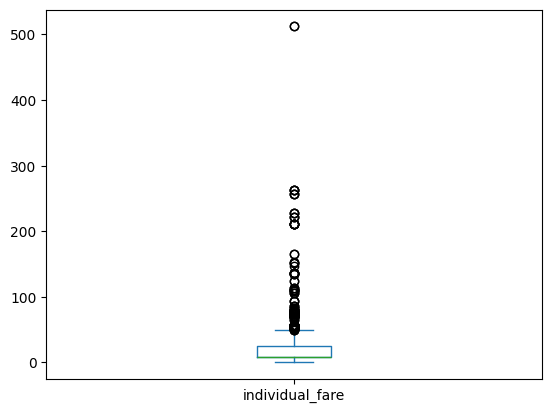

In [62]:
df['individual_fare'].plot(kind='box')

In [63]:
# SipSp and Parch

In [64]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [65]:
# family tyoe
# 0 - alone
# 2-4 - small
# above 5 - large

def family_size(num):
    if num == 1:
        return 'alone'
    elif num>1 and num<5:
        return 'small'
    else:
        return 'large'

In [66]:
df['family_type'] = df['family_size'].apply(family_size)

In [67]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [68]:
# bivarite analysis
pd.crosstab(df['Survived'], df['family_type'], normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [69]:
df['Name'].str.split(',').str.get(0)

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Name, Length: 1727, dtype: object

In [70]:
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [71]:
# univariate analysis
df['Title'].value_counts()

Title
Mr.          997
Miss.        338
Mrs.         269
Master.       82
Rev.          10
Dr.            9
Col.           6
Ms.            3
Mlle.          2
Major.         2
Dona.          2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [72]:
df['Title'] = df['Title'].str.replace('Rev.','other')
df['Title'] = df['Title'].str.replace('Dr.','other')
df['Title'] = df['Title'].str.replace('Col.','other')
df['Title'] = df['Title'].str.replace('Major.','other')
df['Title'] = df['Title'].str.replace('Capt.','other')
df['Title'] = df['Title'].str.replace('the','other')
df['Title'] = df['Title'].str.replace('Jonkheer.','other')

In [73]:
temp_df = df[df['Title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [74]:
pd.crosstab(temp_df['Survived'],temp_df['Title'],normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,72.222222
1.0,57.5,69.78022,15.667311,79.2,27.777778


In [75]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.7764910248986682

In [76]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        8
B57 B59 B63 B66    8
F4                 6
G6                 6
C78                6
                  ..
C90                1
C82                1
E10                1
C104               1
B39                1
Name: count, Length: 186, dtype: int64

In [77]:
df['deck'] = df['Cabin'].str[0]

In [78]:
df['deck'].value_counts()

deck
C    129
B     83
D     59
E     50
A     29
F     29
G      6
T      1
Name: count, dtype: int64

In [79]:
# classes according to their decks
pd.crosstab(df['deck'], df['Pclass'])

Pclass,1,2,3
deck,,,
A,29,0,0
B,83,0,0
C,129,0,0
D,51,8,0
E,43,4,3
F,0,18,11
G,0,0,6
T,1,0,0


<Axes: xlabel='deck'>

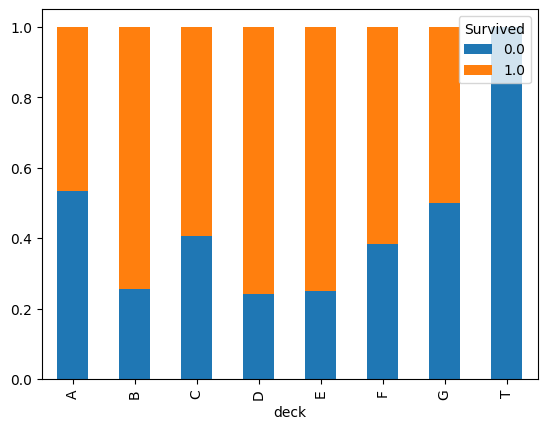

In [86]:
pd.crosstab(df['deck'], df['Survived'], normalize='index').plot(kind='bar', stacked=True)

In [91]:
df.corr()['Survived']

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [92]:
# Assuming 'Survived' column contains categorical data (0 or 1)
df['Survived'] = pd.to_numeric(df['Survived'])

# Calculate correlation between 'Survived' and other columns
correlation_with_survived = df.corr()['Survived']


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'